In [17]:
import pandas as pd


In [18]:
train_df = pd.read_csv('../data/raw/captors.csv')
train_df.head()

,timestamp,température,pression,humidité,salle,capacité,jour_semaine,type_jour,occupation_%,température_ext,événement_spécial
0,2025-06-02T08:00:00,18.54,1009.9,37.4,Amphitheatre,200,Monday,semaine,0.0,19.45,1
1,2025-06-02T08:00:00,19.89,1007.9,37.0,C013,35,Monday,semaine,0.0,19.66,0
2,2025-06-02T08:00:00,20.53,1013.2,39.6,A006,70,Monday,semaine,0.0,19.95,0
3,2025-06-02T09:00:00,30.78,1014.5,37.5,Amphitheatre,200,Monday,semaine,91.5,21.90,0
4,2025-06-02T09:00:00,24.86,1009.0,44.8,C013,35,Monday,semaine,65.5,23.36,0


In [19]:
train_df.describe()

,température,pression,humidité,capacité,occupation_%,température_ext,événement_spécial
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,24.561394,1011.923333,39.687879,101.666667,57.330303,21.686455,0.275758
std,4.765012,2.075395,4.976416,71.092930,32.089582,3.194593,0.447574
min,11.690000,1006.300000,23.600000,35.000000,0.000000,11.730000,0.000000
25%,21.447500,1010.500000,36.400000,35.000000,34.625000,19.652500,0.000000
50%,24.965000,1012.100000,39.600000,70.000000,67.400000,22.450000,0.000000
75%,27.647500,1013.300000,42.775000,200.000000,81.950000,24.085000,1.000000
max,35.510000,1017.500000,52.500000,200.000000,100.000000,27.230000,1.000000


In [20]:
train_df.isnull().sum()

timestamp            0
température          0
pression             0
humidité             0
salle                0
capacité             0
jour_semaine         0
type_jour            0
occupation_%         0
température_ext      0
événement_spécial    0
dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          330 non-null    object 
 1   température        330 non-null    float64
 2   pression           330 non-null    float64
 3   humidité           330 non-null    float64
 4   salle              330 non-null    object 
 5   capacité           330 non-null    int64  
 6   jour_semaine       330 non-null    object 
 7   type_jour          330 non-null    object 
 8   occupation_%       330 non-null    float64
 9   température_ext    330 non-null    float64
 10  événement_spécial  330 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 28.5+ KB


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
train_df["heure"] = train_df["timestamp"].dt.hour
train_df["jour"] = train_df["timestamp"].dt.day_name()

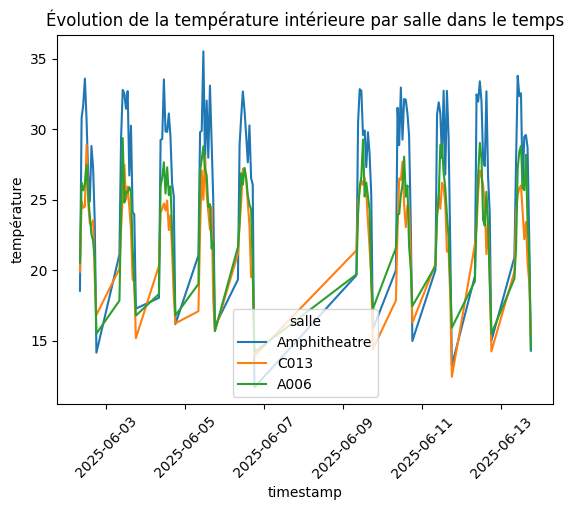

In [24]:
sns.lineplot(data=train_df, x="timestamp", y="température", hue="salle")
plt.title("Évolution de la température intérieure par salle dans le temps")
plt.xticks(rotation=45)
plt.show()


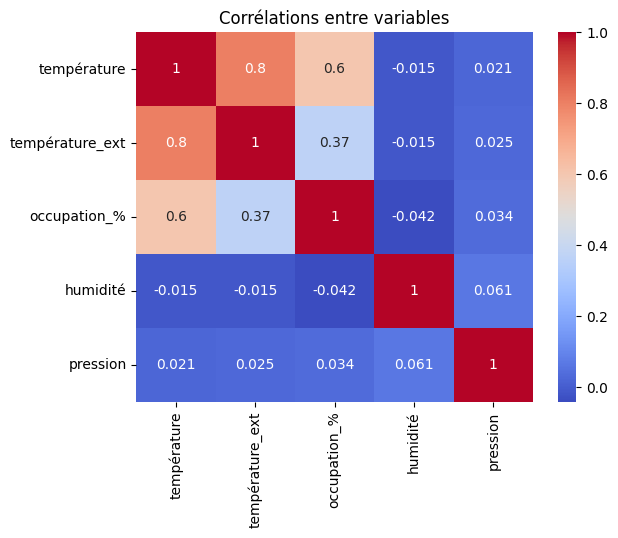

In [25]:
sns.heatmap(
    train_df[
        ["température", "température_ext", "occupation_%", "humidité", "pression"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Corrélations entre variables")
plt.show()


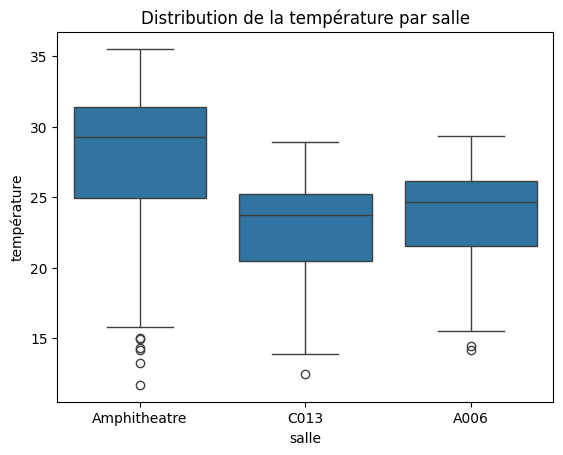

In [26]:
sns.boxplot(data=train_df, x="salle", y="température")
plt.title("Distribution de la température par salle")
plt.show()


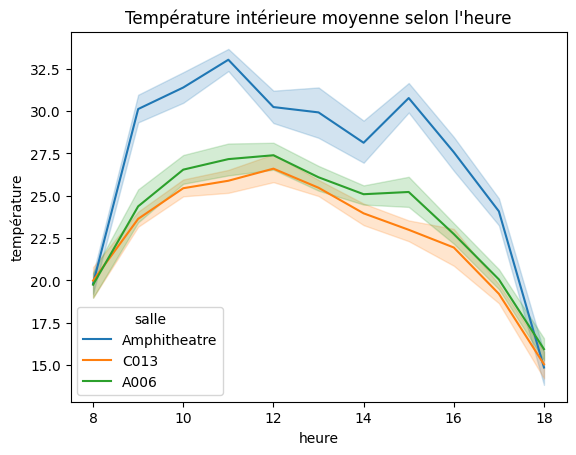

In [27]:
sns.lineplot(data=train_df, x="heure", y="température", hue="salle")
plt.title("Température intérieure moyenne selon l'heure")
plt.show()


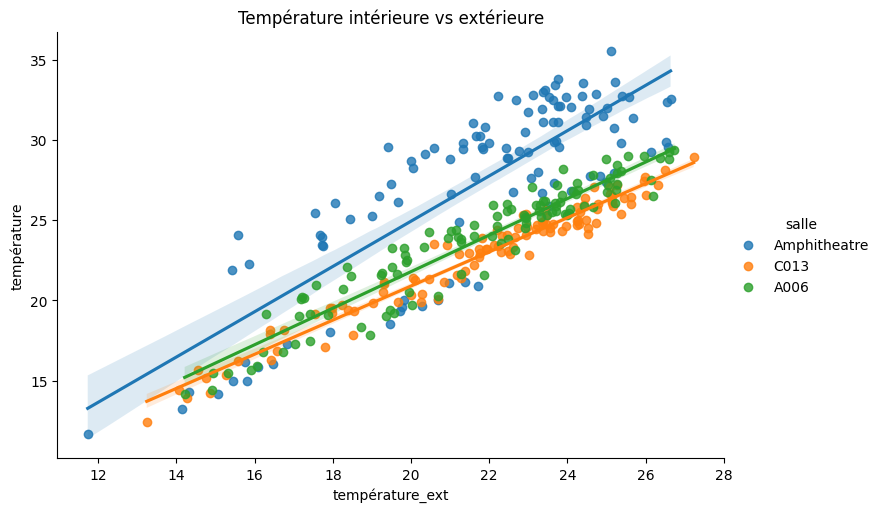

In [28]:
sns.lmplot(data=train_df, x="température_ext", y="température", hue="salle", aspect=1.5)
plt.title("Température intérieure vs extérieure")
plt.show()


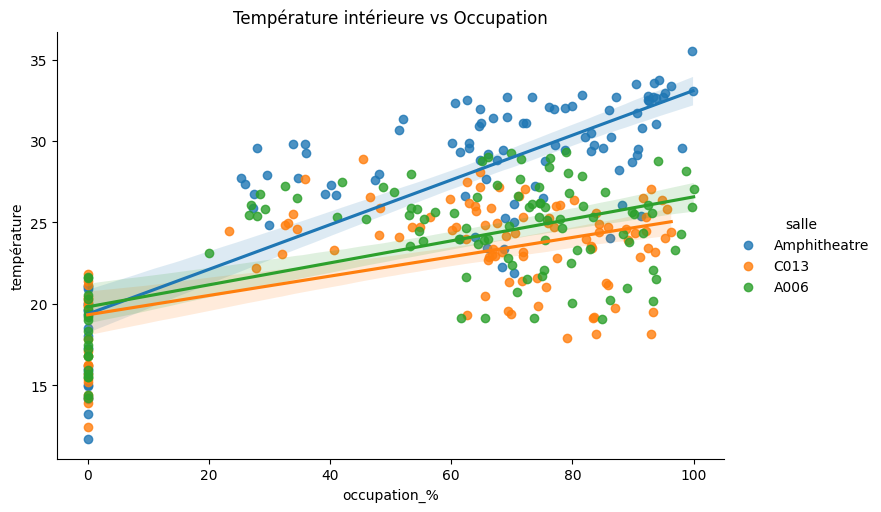

In [29]:
sns.lmplot(data=train_df, x="occupation_%", y="température", hue="salle", aspect=1.5)
plt.title("Température intérieure vs Occupation")
plt.show()


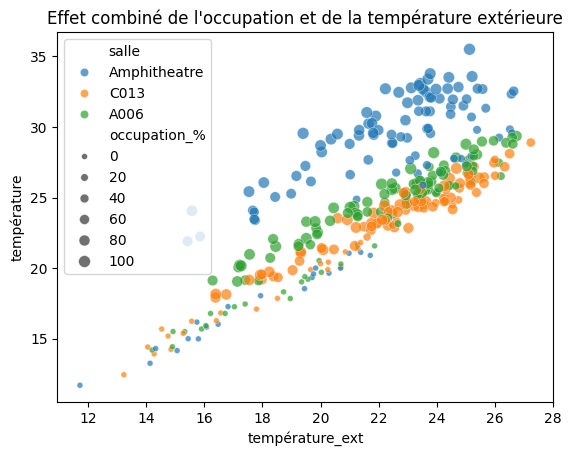

In [30]:
sns.scatterplot(
    data=train_df,
    x="température_ext",
    y="température",
    size="occupation_%",
    hue="salle",
    alpha=0.7,
)
plt.title("Effet combiné de l'occupation et de la température extérieure")
plt.show()


# 🎯 Objectif de l’EDA
Comprendre les facteurs qui influencent la température intérieure dans les salles, afin de construire un modèle de prédiction fiable.

## 🔍 Principaux enseignements

### 1. 📈 La température intérieure varie de manière prévisible dans le temps
- Elle augmente en journée, ce qui suggère un effet d’accumulation thermique (rayonnement, présence humaine).
- Elle est plus basse le matin (ex. à 8h) et redescend après 17h.

>📌 Conclusion : l'heure de la journée est un facteur important, surtout s’il est combiné à d'autres (occupation, température extérieure).

### 2. 🌡️ Lien clair avec la température extérieure
- La température intérieure est positivement corrélée à la température extérieure.
- Mais cette corrélation varie selon les salles (meilleure isolation, exposition, etc.).

>📌 Conclusion : la température extérieure doit absolument être dans ton modèle.

### 3. 👥 L’occupation influence la température
- Lorsqu’une salle est très remplie (80-100%), la température intérieure est systématiquement plus élevée.
- L'effet est plus marqué en milieu ou fin de journée.

>📌 Conclusion : le % d’occupation est un très bon prédicteur, mais l’effet est modéré. Il interagit sans doute avec l’heure et la taille de la salle.

### 4. 🏫 Chaque salle a son propre “comportement thermique”
- L’amphithéâtre (grande capacité) a des variations plus fortes.
- Les petites salles (C013, A006) sont plus sensibles à l’occupation et à la météo.

>📌 Conclusion : un entraînement par salle peut être envisagé.

### 5. 🧪 Corrélations utiles pour le modèle

| Variable               | Corrélation avec température | Utiliser dans le modèle ? |
| ---------------------- | ---------------------------- | ------------------------- |
| Température extérieure | **Forte (+)**                | ✅ Oui                     |
| Occupation %           | **Modérée (+)**              | ✅ Oui                     |
| Heure                  | **Structurelle**             | ✅ Oui                     |
| Salle (catégorielle)   | **Indispensable**            | ✅ Oui                     |
| Humidité / Pression    | Faible à modérée             | ⚠️ À tester               |

